In [1]:
# Bias-Variance Tradeoff: Underfitting vs Overfitting
# A comprehensive demonstration with synthetic 2D data

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set style for better plots
plt.style.use('seaborn-v0_8')
np.random.seed(42)

## 1. Generate Synthetic Dataset

def generate_data(n_samples=100, noise_std=0.3):
    """Generate synthetic dataset with true underlying function"""
    X = np.linspace(0, 1, n_samples).reshape(-1, 1)
    # True function: f(x) = 1.5x^3 - 2x^2 + 0.5x + 0.2
    y_true = 1.5 * X.ravel()**3 - 2 * X.ravel()**2 + 0.5 * X.ravel() + 0.2
    # Add noise
    y = y_true + np.random.normal(0, noise_std, n_samples)
    return X, y, y_true

# Generate training and test data
X_train, y_train, y_train_true = generate_data(n_samples=50, noise_std=0.15)
X_test, y_test, y_test_true = generate_data(n_samples=50, noise_std=0.15)

# Generate fine-grained data for smooth plotting
X_plot = np.linspace(0, 1, 200).reshape(-1, 1)
y_plot_true = 1.5 * X_plot.ravel()**3 - 2 * X_plot.ravel()**2 + 0.5 * X_plot.ravel() + 0.2

print("Dataset generated!")
print(f"Training samples: {len(X_train)}")
print(f"Test samples: {len(X_test)}")

Dataset generated!
Training samples: 50
Test samples: 50



HIGH BIAS - UNDERFITTING EXAMPLE
Underfitting Model (Linear, degree=1):
Training MSE: 0.0192
Test MSE: 0.0194
Gap (Test - Train): 0.0002


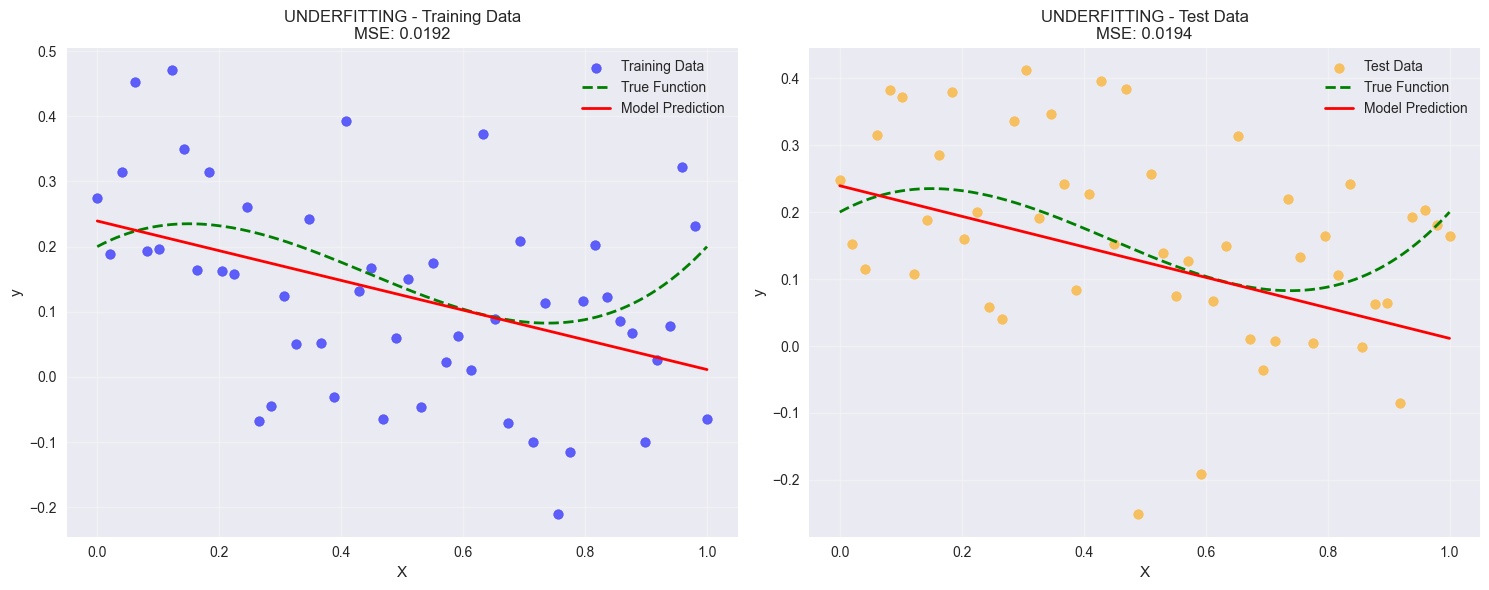


Observations for High Bias (Underfitting):
• Model is too simple (linear) for complex data (cubic)
• High error on both training and test data
• Small gap between train and test error
• Model cannot capture the true underlying pattern


In [3]:
## 2. High Bias - Underfitting Example

print("\n" + "="*50)
print("HIGH BIAS - UNDERFITTING EXAMPLE")
print("="*50)

# Use simple linear regression (degree=1) - too simple for cubic data
underfit_model = Pipeline([
    ('poly', PolynomialFeatures(degree=1)),
    ('linear', LinearRegression())
])

# Train the model
underfit_model.fit(X_train, y_train)

# Make predictions
y_train_pred_underfit = underfit_model.predict(X_train)
y_test_pred_underfit = underfit_model.predict(X_test)
y_plot_pred_underfit = underfit_model.predict(X_plot)

# Calculate errors
train_mse_underfit = mean_squared_error(y_train, y_train_pred_underfit)
test_mse_underfit = mean_squared_error(y_test, y_test_pred_underfit)

print(f"Underfitting Model (Linear, degree=1):")
print(f"Training MSE: {train_mse_underfit:.4f}")
print(f"Test MSE: {test_mse_underfit:.4f}")
print(f"Gap (Test - Train): {test_mse_underfit - train_mse_underfit:.4f}")

# Plot underfitting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Training data plot
ax1.scatter(X_train, y_train, alpha=0.6, color='blue', label='Training Data')
ax1.plot(X_plot, y_plot_true, 'g--', linewidth=2, label='True Function')
ax1.plot(X_plot, y_plot_pred_underfit, 'r-', linewidth=2, label='Model Prediction')
ax1.set_title(f'UNDERFITTING - Training Data\nMSE: {train_mse_underfit:.4f}')
ax1.set_xlabel('X')
ax1.set_ylabel('y')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Test data plot
ax2.scatter(X_test, y_test, alpha=0.6, color='orange', label='Test Data')
ax2.plot(X_plot, y_plot_true, 'g--', linewidth=2, label='True Function')
ax2.plot(X_plot, y_plot_pred_underfit, 'r-', linewidth=2, label='Model Prediction')
ax2.set_title(f'UNDERFITTING - Test Data\nMSE: {test_mse_underfit:.4f}')
ax2.set_xlabel('X')
ax2.set_ylabel('y')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nObservations for High Bias (Underfitting):")
print("• Model is too simple (linear) for complex data (cubic)")
print("• High error on both training and test data")
print("• Small gap between train and test error")
print("• Model cannot capture the true underlying pattern")


HIGH VARIANCE - OVERFITTING EXAMPLE
Overfitting Model (Polynomial, degree=15):
Training MSE: 0.0113
Test MSE: 0.0227
Gap (Test - Train): 0.0114


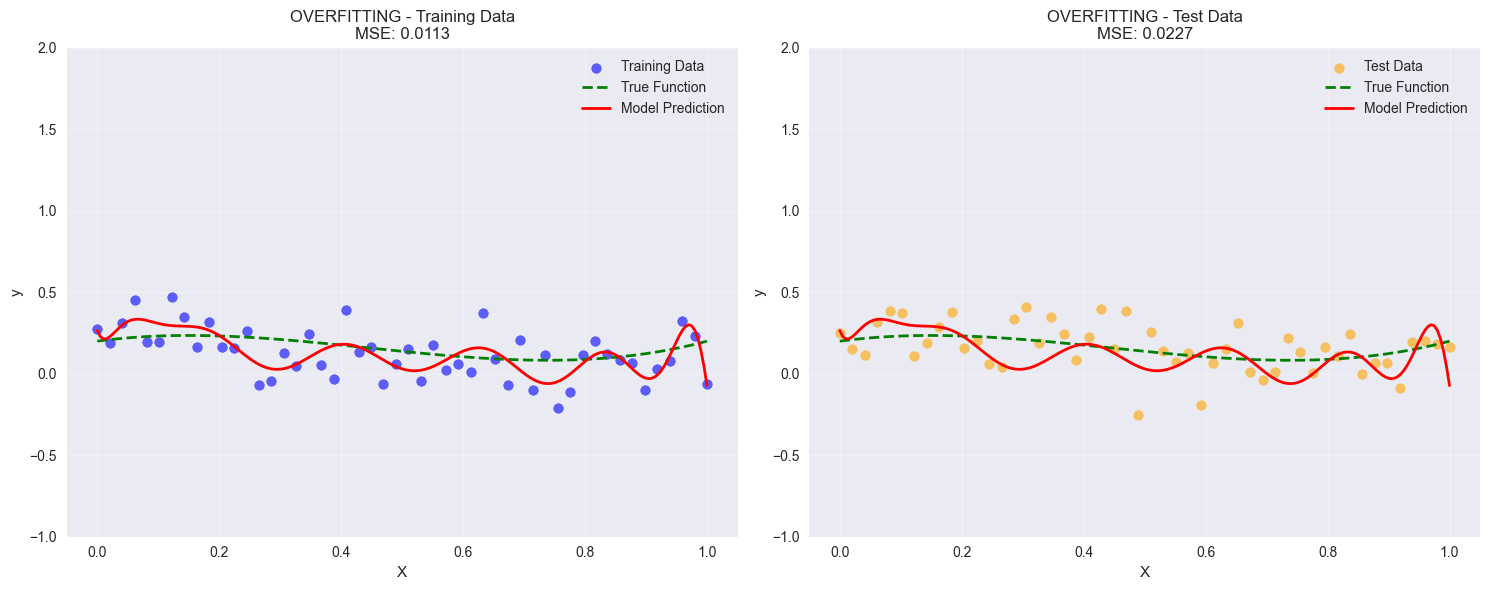


Observations for High Variance (Overfitting):
• Model is too complex (degree 15) for available data
• Very low error on training data (memorized the noise)
• High error on test data (poor generalization)
• Large gap between train and test error
• Model is sensitive to small changes in training data


In [4]:
## 3. High Variance - Overfitting Example

print("\n" + "="*50)
print("HIGH VARIANCE - OVERFITTING EXAMPLE")
print("="*50)

# Use high-degree polynomial (degree=15) - too complex, will overfit
overfit_model = Pipeline([
    ('poly', PolynomialFeatures(degree=15)),
    ('linear', LinearRegression())
])

# Train the model
overfit_model.fit(X_train, y_train)

# Make predictions
y_train_pred_overfit = overfit_model.predict(X_train)
y_test_pred_overfit = overfit_model.predict(X_test)
y_plot_pred_overfit = overfit_model.predict(X_plot)

# Calculate errors
train_mse_overfit = mean_squared_error(y_train, y_train_pred_overfit)
test_mse_overfit = mean_squared_error(y_test, y_test_pred_overfit)

print(f"Overfitting Model (Polynomial, degree=15):")
print(f"Training MSE: {train_mse_overfit:.4f}")
print(f"Test MSE: {test_mse_overfit:.4f}")
print(f"Gap (Test - Train): {test_mse_overfit - train_mse_overfit:.4f}")

# Plot overfitting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Training data plot
ax1.scatter(X_train, y_train, alpha=0.6, color='blue', label='Training Data')
ax1.plot(X_plot, y_plot_true, 'g--', linewidth=2, label='True Function')
ax1.plot(X_plot, y_plot_pred_overfit, 'r-', linewidth=2, label='Model Prediction')
ax1.set_title(f'OVERFITTING - Training Data\nMSE: {train_mse_overfit:.4f}')
ax1.set_xlabel('X')
ax1.set_ylabel('y')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_ylim(-1, 2)  # Limit y-axis for better visualization

# Test data plot
ax2.scatter(X_test, y_test, alpha=0.6, color='orange', label='Test Data')
ax2.plot(X_plot, y_plot_true, 'g--', linewidth=2, label='True Function')
ax2.plot(X_plot, y_plot_pred_overfit, 'r-', linewidth=2, label='Model Prediction')
ax2.set_title(f'OVERFITTING - Test Data\nMSE: {test_mse_overfit:.4f}')
ax2.set_xlabel('X')
ax2.set_ylabel('y')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.set_ylim(-1, 2)  # Limit y-axis for better visualization

plt.tight_layout()
plt.show()

print("\nObservations for High Variance (Overfitting):")
print("• Model is too complex (degree 15) for available data")
print("• Very low error on training data (memorized the noise)")
print("• High error on test data (poor generalization)")
print("• Large gap between train and test error")
print("• Model is sensitive to small changes in training data")


BIAS-VARIANCE TRADEOFF COMPREHENSIVE ANALYSIS


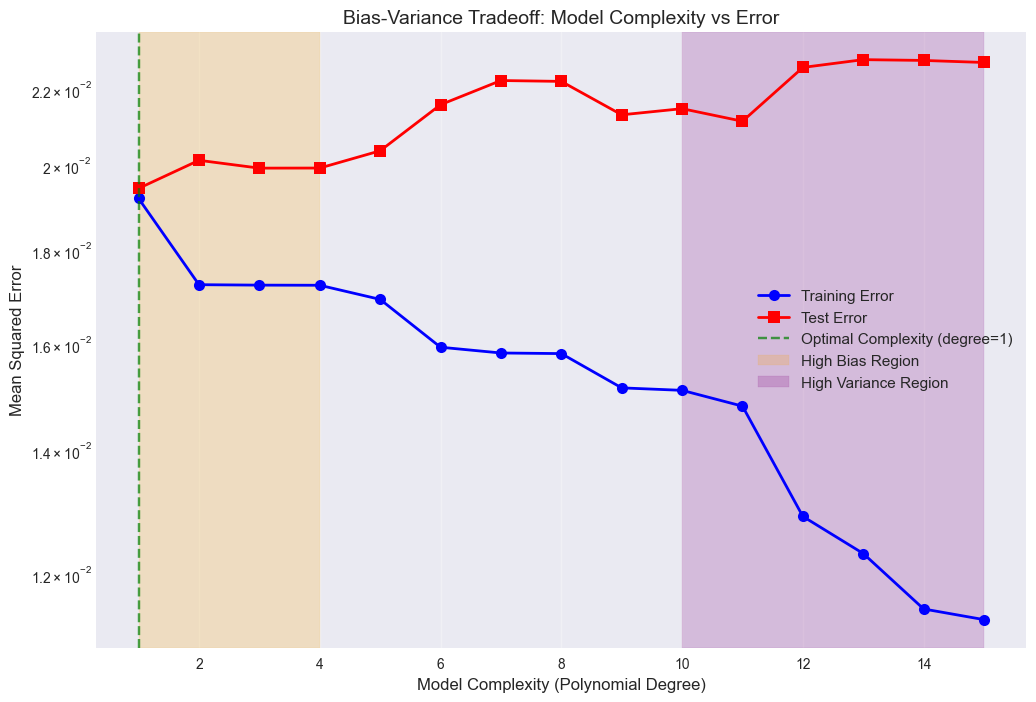


Detailed Analysis:
Degree   Train MSE    Test MSE     Gap          Interpretation
----------------------------------------------------------------------
1        0.0192       0.0194       0.0002       High Bias
2        0.0172       0.0201       0.0029       High Bias
3        0.0172       0.0199       0.0027       High Bias
4        0.0172       0.0199       0.0027       Good Balance
5        0.0169       0.0204       0.0035       Good Balance
6        0.0159       0.0216       0.0056       Good Balance
7        0.0158       0.0222       0.0064       Good Balance
8        0.0158       0.0222       0.0064       Good Balance
9        0.0151       0.0213       0.0062       Good Balance
10       0.0151       0.0215       0.0064       High Variance
11       0.0148       0.0211       0.0063       High Variance
12       0.0129       0.0226       0.0097       High Variance
13       0.0123       0.0228       0.0105       High Variance
14       0.0115       0.0228       0.0113       High Varia

In [5]:
## 4. Bias-Variance Tradeoff Analysis

print("\n" + "="*60)
print("BIAS-VARIANCE TRADEOFF COMPREHENSIVE ANALYSIS")
print("="*60)

# Test different polynomial degrees
degrees = range(1, 16)
train_errors = []
test_errors = []

for degree in degrees:
    # Create and train model
    model = Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('linear', LinearRegression())
    ])
    
    model.fit(X_train, y_train)
    
    # Calculate errors
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_mse = mean_squared_error(y_train, train_pred)
    test_mse = mean_squared_error(y_test, test_pred)
    
    train_errors.append(train_mse)
    test_errors.append(test_mse)

# Plot bias-variance tradeoff
plt.figure(figsize=(12, 8))
plt.plot(degrees, train_errors, 'o-', color='blue', linewidth=2, 
         markersize=8, label='Training Error')
plt.plot(degrees, test_errors, 's-', color='red', linewidth=2, 
         markersize=8, label='Test Error')

# Mark the optimal point
optimal_idx = np.argmin(test_errors)
optimal_degree = degrees[optimal_idx]
plt.axvline(x=optimal_degree, color='green', linestyle='--', alpha=0.7,
           label=f'Optimal Complexity (degree={optimal_degree})')

# Add regions
plt.axvspan(1, 4, alpha=0.2, color='orange', label='High Bias Region')
plt.axvspan(10, 15, alpha=0.2, color='purple', label='High Variance Region')

plt.xlabel('Model Complexity (Polynomial Degree)', fontsize=12)
plt.ylabel('Mean Squared Error', fontsize=12)
plt.title('Bias-Variance Tradeoff: Model Complexity vs Error', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.yscale('log')  # Log scale for better visualization
plt.show()

# Print detailed analysis
print(f"\nDetailed Analysis:")
print(f"{'Degree':<8} {'Train MSE':<12} {'Test MSE':<12} {'Gap':<12} {'Interpretation'}")
print("-" * 70)

for i, degree in enumerate(degrees):
    gap = test_errors[i] - train_errors[i]
    if degree <= 3:
        interpretation = "High Bias"
    elif degree >= 10:
        interpretation = "High Variance"
    elif degree == optimal_degree:
        interpretation = "OPTIMAL"
    else:
        interpretation = "Good Balance"
    
    print(f"{degree:<8} {train_errors[i]:<12.4f} {test_errors[i]:<12.4f} "
          f"{gap:<12.4f} {interpretation}")


OPTIMAL BALANCE EXAMPLE
Optimal Model (Polynomial, degree=1):
Training MSE: 0.0192
Test MSE: 0.0194
Gap (Test - Train): 0.0002


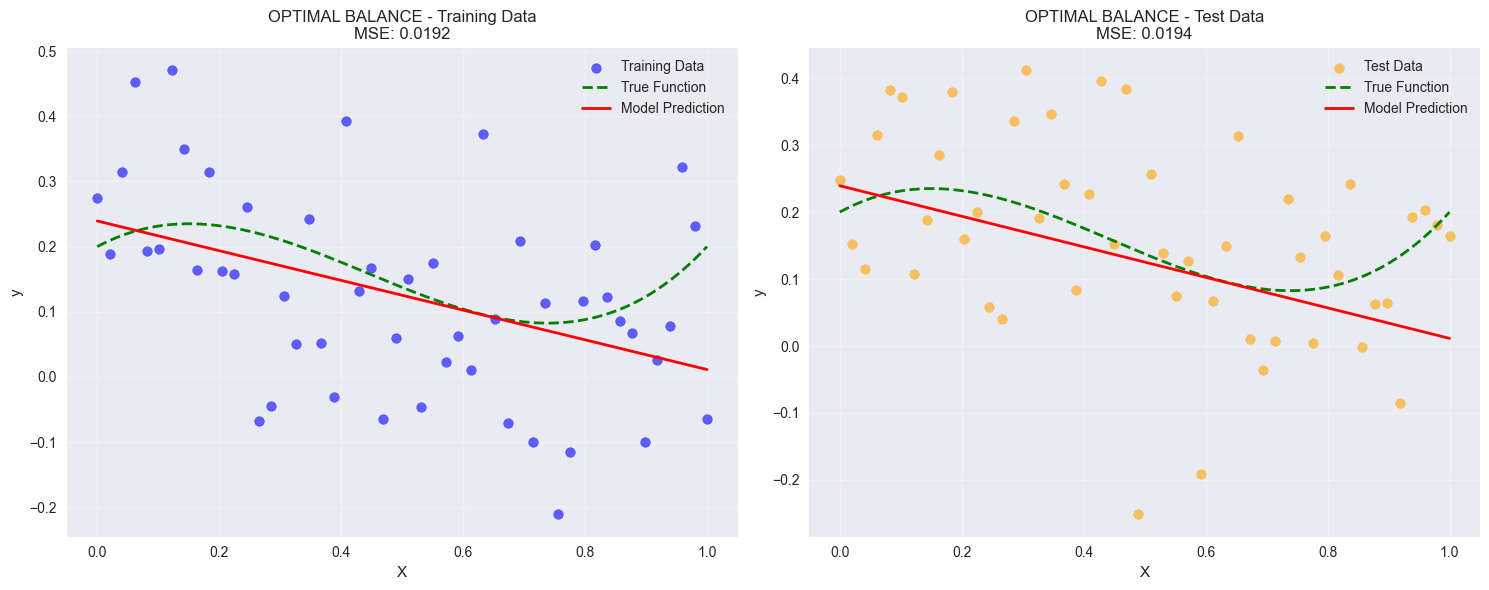

In [6]:
## 5. Perfect Balance Example

print("\n" + "="*50)
print("OPTIMAL BALANCE EXAMPLE")
print("="*50)

# Use optimal degree (usually around 3-4 for this cubic data)
optimal_model = Pipeline([
    ('poly', PolynomialFeatures(degree=optimal_degree)),
    ('linear', LinearRegression())
])

optimal_model.fit(X_train, y_train)

# Make predictions
y_train_pred_optimal = optimal_model.predict(X_train)
y_test_pred_optimal = optimal_model.predict(X_test)
y_plot_pred_optimal = optimal_model.predict(X_plot)

# Calculate errors
train_mse_optimal = mean_squared_error(y_train, y_train_pred_optimal)
test_mse_optimal = mean_squared_error(y_test, y_test_pred_optimal)

print(f"Optimal Model (Polynomial, degree={optimal_degree}):")
print(f"Training MSE: {train_mse_optimal:.4f}")
print(f"Test MSE: {test_mse_optimal:.4f}")
print(f"Gap (Test - Train): {test_mse_optimal - train_mse_optimal:.4f}")

# Plot optimal balance
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Training data plot
ax1.scatter(X_train, y_train, alpha=0.6, color='blue', label='Training Data')
ax1.plot(X_plot, y_plot_true, 'g--', linewidth=2, label='True Function')
ax1.plot(X_plot, y_plot_pred_optimal, 'r-', linewidth=2, label='Model Prediction')
ax1.set_title(f'OPTIMAL BALANCE - Training Data\nMSE: {train_mse_optimal:.4f}')
ax1.set_xlabel('X')
ax1.set_ylabel('y')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Test data plot
ax2.scatter(X_test, y_test, alpha=0.6, color='orange', label='Test Data')
ax2.plot(X_plot, y_plot_true, 'g--', linewidth=2, label='True Function')
ax2.plot(X_plot, y_plot_pred_optimal, 'r-', linewidth=2, label='Model Prediction')
ax2.set_title(f'OPTIMAL BALANCE - Test Data\nMSE: {test_mse_optimal:.4f}')
ax2.set_xlabel('X')
ax2.set_ylabel('y')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


FINAL SUMMARY COMPARISON


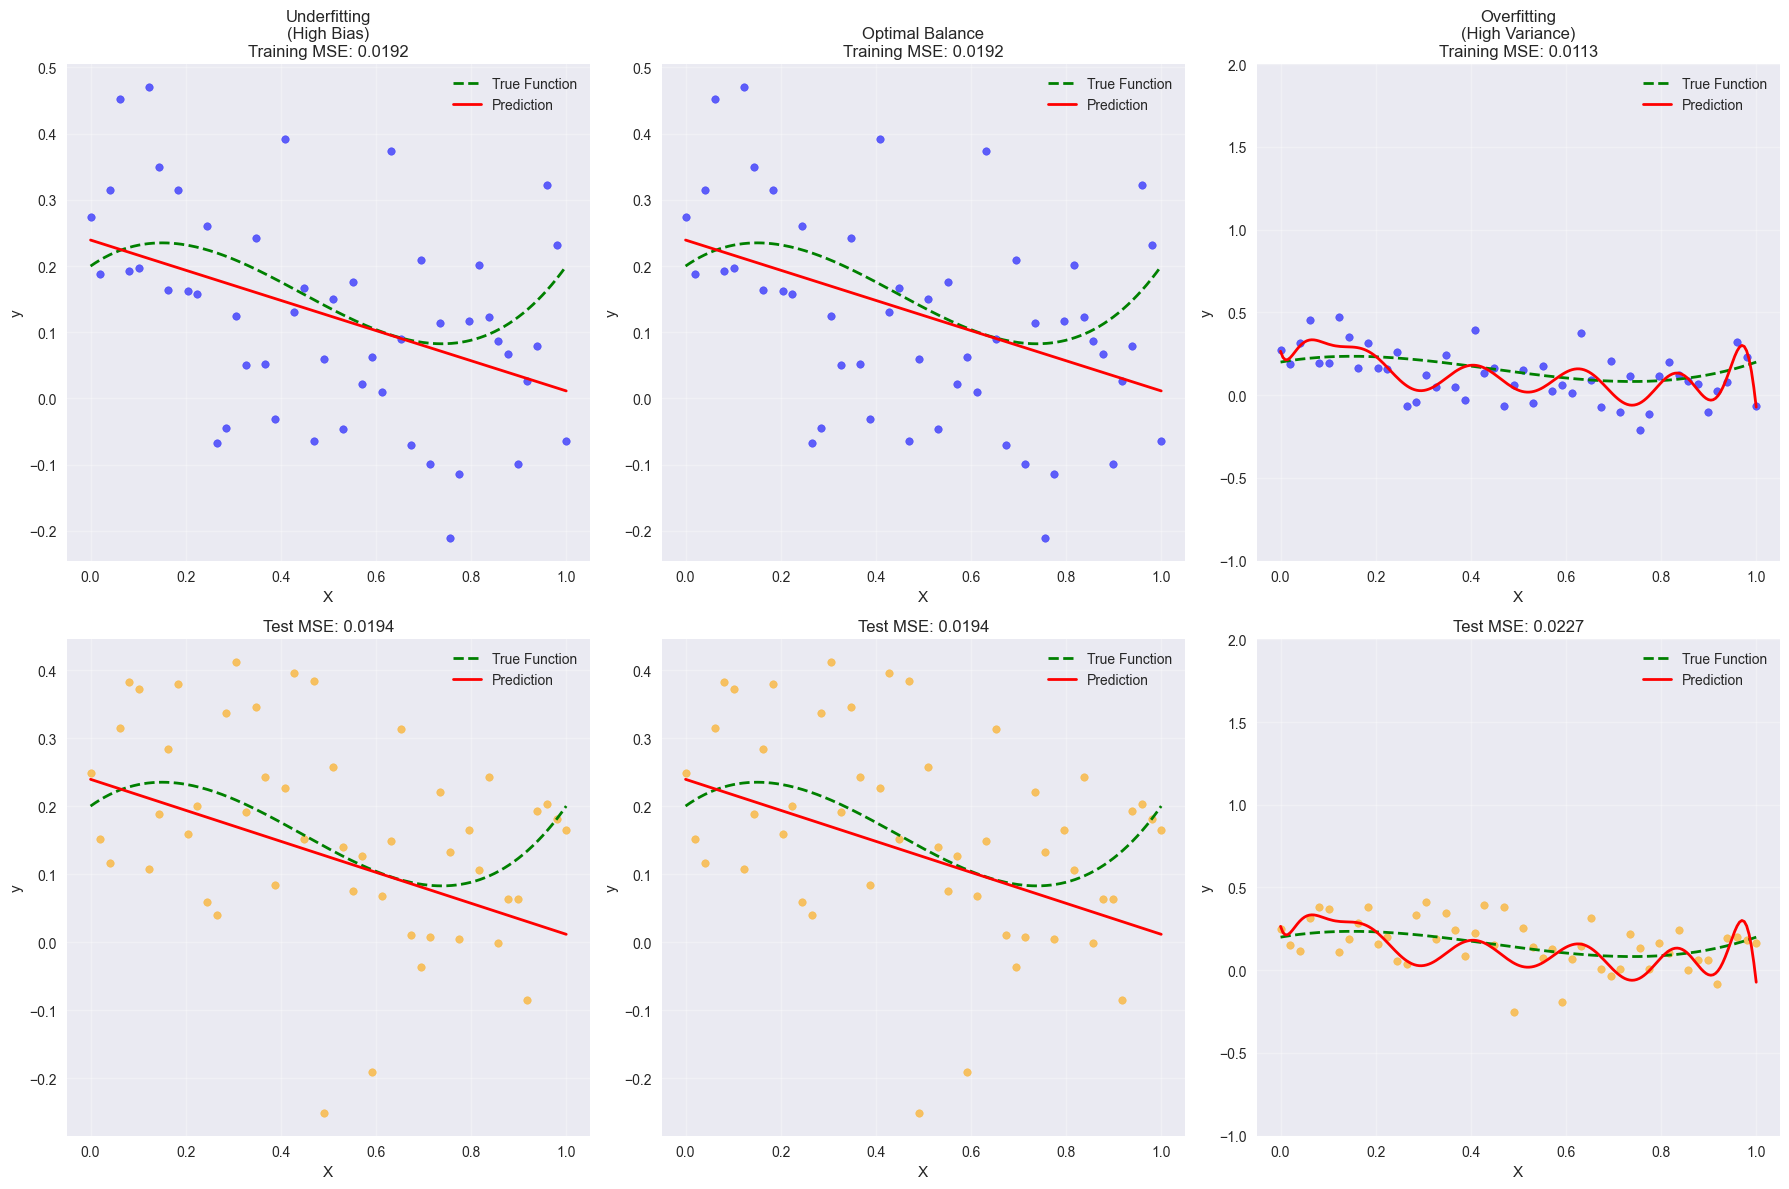

In [7]:
## 6. Summary Comparison

print("\n" + "="*60)
print("FINAL SUMMARY COMPARISON")
print("="*60)

# Create comparison plot
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

models = [
    ('Underfitting\n(High Bias)', underfit_model, y_plot_pred_underfit, 
     train_mse_underfit, test_mse_underfit),
    ('Optimal Balance', optimal_model, y_plot_pred_optimal, 
     train_mse_optimal, test_mse_optimal),
    ('Overfitting\n(High Variance)', overfit_model, y_plot_pred_overfit, 
     train_mse_overfit, test_mse_overfit)
]

for i, (title, model, y_pred, train_mse, test_mse) in enumerate(models):
    # Training data subplot
    axes[0, i].scatter(X_train, y_train, alpha=0.6, color='blue', s=30)
    axes[0, i].plot(X_plot, y_plot_true, 'g--', linewidth=2, label='True Function')
    axes[0, i].plot(X_plot, y_pred, 'r-', linewidth=2, label='Prediction')
    axes[0, i].set_title(f'{title}\nTraining MSE: {train_mse:.4f}')
    axes[0, i].set_xlabel('X')
    axes[0, i].set_ylabel('y')
    axes[0, i].legend()
    axes[0, i].grid(True, alpha=0.3)
    if i == 2:  # Limit y-axis for overfitting plot
        axes[0, i].set_ylim(-1, 2)
    
    # Test data subplot
    axes[1, i].scatter(X_test, y_test, alpha=0.6, color='orange', s=30)
    axes[1, i].plot(X_plot, y_plot_true, 'g--', linewidth=2, label='True Function')
    axes[1, i].plot(X_plot, y_pred, 'r-', linewidth=2, label='Prediction')
    axes[1, i].set_title(f'Test MSE: {test_mse:.4f}')
    axes[1, i].set_xlabel('X')
    axes[1, i].set_ylabel('y')
    axes[1, i].legend()
    axes[1, i].grid(True, alpha=0.3)
    if i == 2:  # Limit y-axis for overfitting plot
        axes[1, i].set_ylim(-1, 2)
plt.tight_layout()
plt.show()

In [8]:
# Print final comparison table
print("\nFinal Comparison:")
print(f"{'Model Type':<20} {'Train MSE':<12} {'Test MSE':<12} {'Gap':<12} {'Characteristics'}")
print("-" * 80)
print(f"{'High Bias':<20} {train_mse_underfit:<12.4f} {test_mse_underfit:<12.4f} "
      f"{test_mse_underfit-train_mse_underfit:<12.4f} Too simple, poor fit")
print(f"{'Optimal Balance':<20} {train_mse_optimal:<12.4f} {test_mse_optimal:<12.4f} "
      f"{test_mse_optimal-train_mse_optimal:<12.4f} Good generalization")
print(f"{'High Variance':<20} {train_mse_overfit:<12.4f} {test_mse_overfit:<12.4f} "
      f"{test_mse_overfit-train_mse_overfit:<12.4f} Memorizes noise")

## 7. Key Takeaways

print("\n" + "="*60)
print("KEY TAKEAWAYS: BIAS-VARIANCE TRADEOFF")
print("="*60)


Final Comparison:
Model Type           Train MSE    Test MSE     Gap          Characteristics
--------------------------------------------------------------------------------
High Bias            0.0192       0.0194       0.0002       Too simple, poor fit
Optimal Balance      0.0192       0.0194       0.0002       Good generalization
High Variance        0.0113       0.0227       0.0114       Memorizes noise

KEY TAKEAWAYS: BIAS-VARIANCE TRADEOFF


In [9]:
takeaways = [
    "BIAS (Underfitting):",
    "  • High error on both training and test data",
    "  • Model is too simple to capture underlying patterns",
    "  • Small gap between train and test error",
    "  • Solution: Increase model complexity",
    "",
    "VARIANCE (Overfitting):",
    "  • Low training error, high test error",
    "  • Model memorizes training data including noise",
    "  • Large gap between train and test error",
    "  • Solution: Reduce model complexity or add regularization",
    "",
    "OPTIMAL BALANCE:",
    "  • Moderate error on both training and test data",
    "  • Good generalization to unseen data",
    "  • Small gap between train and test error",
    "  • Best real-world performance",
    "",
    "GENERAL STRATEGY:",
    "  • Start simple, gradually increase complexity",
    "  • Use validation curves to find optimal complexity",
    "  • Monitor both training and test performance",
    "  • Consider regularization techniques for complex models"
]

In [10]:
for takeaway in takeaways:
    print(takeaway)

print("\n" + "="*60)
print("END OF BIAS-VARIANCE TRADEOFF DEMONSTRATION")
print("="*60)

BIAS (Underfitting):
  • High error on both training and test data
  • Model is too simple to capture underlying patterns
  • Small gap between train and test error
  • Solution: Increase model complexity

VARIANCE (Overfitting):
  • Low training error, high test error
  • Model memorizes training data including noise
  • Large gap between train and test error
  • Solution: Reduce model complexity or add regularization

OPTIMAL BALANCE:
  • Moderate error on both training and test data
  • Good generalization to unseen data
  • Small gap between train and test error
  • Best real-world performance

GENERAL STRATEGY:
  • Start simple, gradually increase complexity
  • Use validation curves to find optimal complexity
  • Monitor both training and test performance
  • Consider regularization techniques for complex models

END OF BIAS-VARIANCE TRADEOFF DEMONSTRATION
